In [9]:
import pandas as pd
import numpy as np

In [10]:
train=pd.read_csv('tita trai.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)

In [13]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

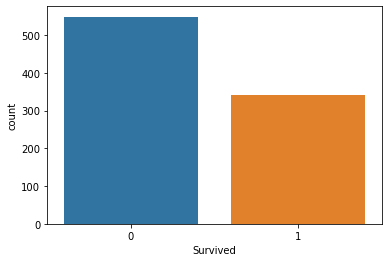

In [16]:
sns.countplot(x=train['Survived'])

In [17]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

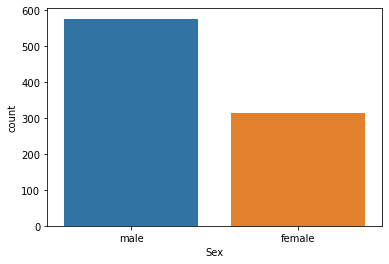

In [18]:
sns.countplot(x=train['Sex'])

In [19]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

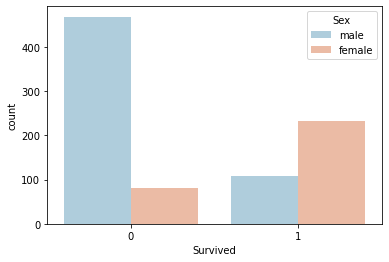

In [20]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

# Plot two numerical columns.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

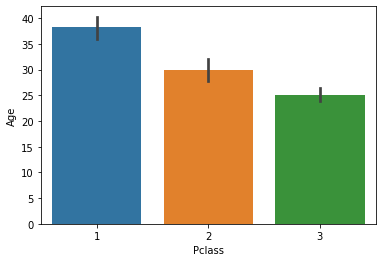

In [21]:
sns.barplot(x='Pclass',y='Age',data=train) 

# Plot one numerical and one categorical column.

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

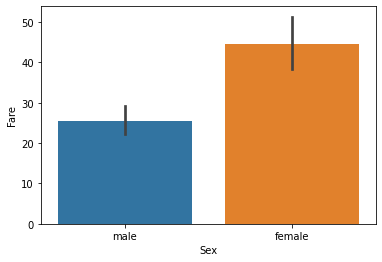

In [22]:
sns.barplot(x='Sex',y='Fare',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

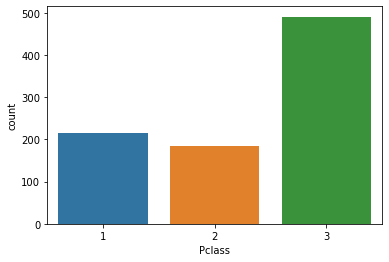

In [23]:
sns.countplot(x=train['Pclass'])

In [24]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

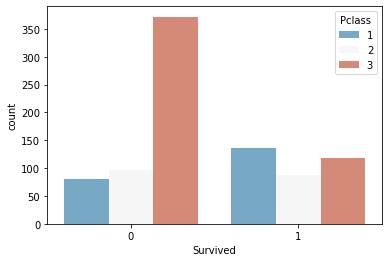

In [25]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='RdBu_r')

<AxesSubplot:>

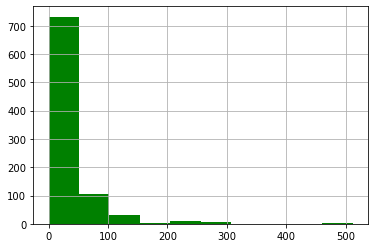

In [26]:
train['Fare'].hist(color='green')

C:\Users\balakrishna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

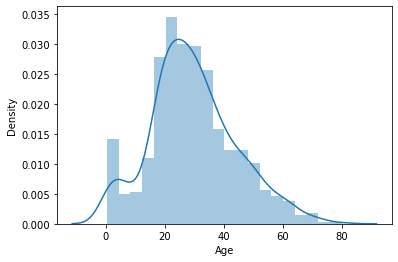

In [27]:
sns.distplot(train['Age'])

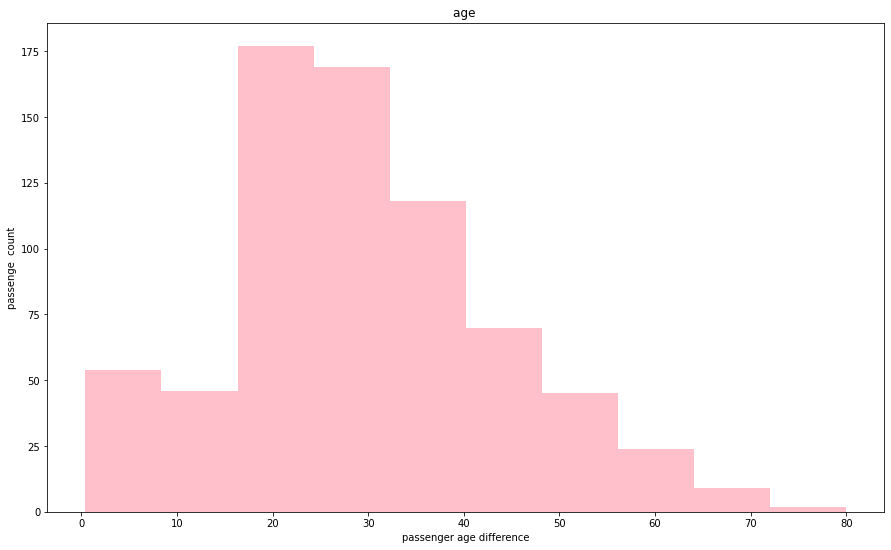

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
plt.hist(train['Age'],color='pink')
plt.title('age ')
plt.xlabel('passenger age difference')
plt.ylabel('passenge  count')
plt.show()

# Plot two numerical columns and one categorical column.

C:\Users\balakrishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

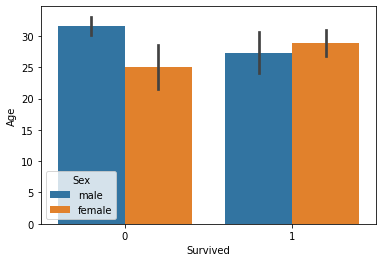

In [29]:
sns.barplot('Survived','Age','Sex',data=train)

# Missing Data

In [30]:
train.isna().sum()
#Check null values in a columns.

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [31]:
#full missing values mean of the numerical columns
train['Age']=train['Age'].fillna(train['Age'].mean())
train['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [32]:
#full missing values mode of the categorical columns
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [33]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [34]:
train['Age'].nunique()

89

In [35]:
cate_cols=['Embarked','Sex']

In [36]:
train[cate_cols]=train[cate_cols].astype('category')

In [37]:
cat_col=pd.DataFrame(train[cate_cols])
cat_col

,Embarked,Sex
0,S,male
1,C,female
2,S,female
3,S,female
4,S,male
...,...,...
886,S,male
887,S,female
888,S,female
889,C,male


In [38]:
import matplotlib.pyplot as plt

# Check the cardinality of a categorical column.

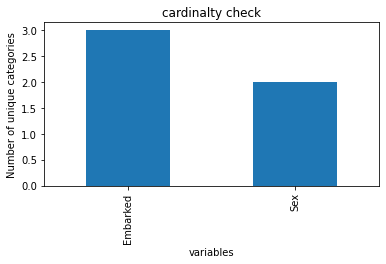

In [39]:
cat_col.nunique().plot.bar(figsize=(6,3))
plt.ylabel('Number of unique categories')
plt.xlabel('variables')
plt.title('cardinalty check')
plt.show()
#Check the cardinality of a categorical column.

In [40]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [41]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
num_cols=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [43]:
train[num_cols]=train[num_cols].astype('int64')
train[num_cols]

,Pclass,Age,SibSp,Parch,Fare
0,3,22,1,0,7
1,1,38,1,0,71
2,3,26,0,0,7
3,1,35,1,0,53
4,3,35,0,0,8
...,...,...,...,...,...
886,2,27,0,0,13
887,1,19,0,0,30
888,3,29,1,2,23
889,1,26,0,0,30


<AxesSubplot:>

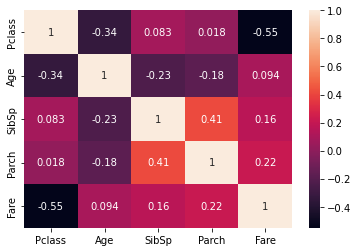

In [44]:
sns.heatmap(train[num_cols].corr(),annot=True)

In [45]:
y=train['Survived']

In [46]:
x=train.drop(['Survived'],axis=1)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
#train_test_split(x,y,test_size=0.1)
#x of training set,x of testing set,y of training set,y of testing set,
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123) i have stored in varibales

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [50]:
x_train.shape

(712, 7)

In [51]:
x_test.shape

(179, 7)

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
xtr_oh=OneHotEncoder()

In [54]:
xtr_oh.fit(x_train[cate_cols])

OneHotEncoder()

In [55]:
xtr_trs=xtr_oh.transform(x_train[cate_cols]).toarray()
xte_trs=xtr_oh.transform(x_test[cate_cols]).toarray()

In [56]:
xtr_oh_df=pd.DataFrame(xtr_trs)
xte_oh_df=pd.DataFrame(xte_trs)

In [57]:
#on_ca.get_feature_names_out()

In [58]:
#on_tra[:1]

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
xtr_sc=StandardScaler()
xtr_sc.fit(x_train[num_cols])

StandardScaler()

In [61]:
xtr_sc_trans=xtr_sc.transform(x_train[num_cols])
xte_sc_trans=xtr_sc.transform(x_test[num_cols])

In [62]:
scal_df1=pd.DataFrame(xtr_sc_trans)
scal_df2=pd.DataFrame(xte_sc_trans)

In [63]:
xtr_con=pd.concat([xtr_oh_df,scal_df1],axis=1)
xte_con=pd.concat([xte_oh_df,scal_df2],axis=1)

In [64]:
scal_df1.shape

(712, 5)

In [65]:
xtr_con.shape, xte_con.shape, y_train.shape, x_train.shape

((712, 10), (179, 10), (712,), (712, 7))

In [66]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,f1_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred))  
    print('F1 Score:\n',f1_score(act,pred))

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
Log_re=LogisticRegression()

In [69]:
Log_re.fit(xtr_con,y_train)

LogisticRegression()

In [70]:
predic_xtr=Log_re.predict(xtr_con)
predic_xte=Log_re.predict(xte_con)

In [71]:
evaluate_model(y_train,predic_xtr)
evaluate_model(y_test,predic_xte)

Confusion Matrix 
 [[370  65]
 [ 81 196]]
Accurcay :  0.7949438202247191
Recall   :  0.7075812274368231
Precision:  0.7509578544061303
F1 Score:
 0.7286245353159851
Confusion Matrix 
 [[95 19]
 [15 50]]
Accurcay :  0.8100558659217877
Recall   :  0.7692307692307693
Precision:  0.7246376811594203
F1 Score:
 0.7462686567164178


In [72]:
log_tr_sco=[0.7949438202247191
,0.7075812274368231
,0.7509578544061303
,0.7286245353159851]
log_te_sco=[0.8100558659217877
,0.7692307692307693
,0.7246376811594203
,0.7462686567164178]

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt_tr=DecisionTreeClassifier()

In [75]:
dt_tr.fit(xtr_con,y_train)

DecisionTreeClassifier()

In [76]:
predic_xdtr=dt_tr.predict(xtr_con)
predic_xdte=dt_tr.predict(xte_con)

In [77]:
evaluate_model(y_train,predic_xdtr)
evaluate_model(y_test,predic_xdte)

Confusion Matrix 
 [[432   3]
 [ 25 252]]
Accurcay :  0.9606741573033708
Recall   :  0.9097472924187726
Precision:  0.9882352941176471
F1 Score:
 0.9473684210526316
Confusion Matrix 
 [[98 16]
 [18 47]]
Accurcay :  0.8100558659217877
Recall   :  0.7230769230769231
Precision:  0.746031746031746
F1 Score:
 0.7343749999999999


In [78]:
dec_tr_sc=[0.9606741573033708
,0.9097472924187726
,0.9882352941176471
,0.9473684210526316]
dec_te_sc=[0.7988826815642458
,0.7230769230769231
,0.7230769230769231
,0.723076923076923]

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
gr_dt=DecisionTreeClassifier(random_state=123)

In [81]:
param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(1,10,2)}

In [82]:
grid_cv=GridSearchCV(estimator=gr_dt,param_grid=param_grid,cv=5,n_jobs=3)

In [83]:
grid_cv.fit(xtr_con,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 3, 5, 7, 9])})

In [84]:
grid_cv.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [85]:
gr_tr=grid_cv.predict(xtr_con)
gr_te=grid_cv.predict(xte_con)

In [86]:
gr_tr

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [87]:
gr_te

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [88]:
print('Train')
evaluate_model(y_train,gr_tr)
print('Test')
evaluate_model(y_test,gr_te)

Train
Confusion Matrix 
 [[380  55]
 [ 74 203]]
Accurcay :  0.8188202247191011
Recall   :  0.7328519855595668
Precision:  0.7868217054263565
F1 Score:
 0.7588785046728973
Test
Confusion Matrix 
 [[98 16]
 [16 49]]
Accurcay :  0.8212290502793296
Recall   :  0.7538461538461538
Precision:  0.7538461538461538
F1 Score:
 0.7538461538461538


In [89]:
dec_gri_tr=[0.8188202247191011
,0.7328519855595668
,0.7868217054263565
,0.7588785046728973]
dec_gri_te=[0.8212290502793296
,0.7538461538461538
,0.7538461538461538
,0.7538461538461538]

In [90]:
erro_df=pd.DataFrame({'log_tr_sco':log_tr_sco,'log_te_sco':log_te_sco,
                      'dec_tr_sc':dec_tr_sc,'dec_te_sc':dec_te_sc,
                      'ddec_gri_tr':dec_gri_tr,'dgdec_gri_te':dec_gri_te,})
erro_df

,log_tr_sco,log_te_sco,dec_tr_sc,dec_te_sc,ddec_gri_tr,dgdec_gri_te
0,0.794944,0.810056,0.960674,0.798883,0.818820,0.821229
1,0.707581,0.769231,0.909747,0.723077,0.732852,0.753846
2,0.750958,0.724638,0.988235,0.723077,0.786822,0.753846
3,0.728625,0.746269,0.947368,0.723077,0.758879,0.753846


In [93]:
error_dataframe=erro_df.rename({0:'Accu_scor',1:'reca_sco',2:'prec_sco',3:'f1_sco'})
error_dataframe

,log_tr_sco,log_te_sco,dec_tr_sc,dec_te_sc,ddec_gri_tr,dgdec_gri_te
Accu_scor,0.794944,0.810056,0.960674,0.798883,0.818820,0.821229
reca_sco,0.707581,0.769231,0.909747,0.723077,0.732852,0.753846
prec_sco,0.750958,0.724638,0.988235,0.723077,0.786822,0.753846
f1_sco,0.728625,0.746269,0.947368,0.723077,0.758879,0.753846


In [94]:
test=pd.read_csv('tita tes.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [95]:
test.shape

(418, 11)

In [96]:
pas_id=test['PassengerId']

In [97]:
#Pass=pas.pop

In [98]:
test.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)

In [99]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Age']

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [100]:
test['Embarked']=test['Embarked'].fillna(test['Embarked'].mode()[0])

In [101]:
test['Fare'] = test['Fare'].fillna(1)

In [102]:
test.dropna(how='any',inplace=True)
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [103]:
test_cat=['Embarked','Sex']
test[test_cat]=test[test_cat].astype('category')

In [104]:
test_num=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 
test[test_num]=test[test_num].astype('int64')

In [105]:
te_oh=OneHotEncoder()
te_oh.fit(test[test_cat])
te_trans=te_oh.transform(test[test_cat]).toarray()

In [106]:
tes_df1=pd.DataFrame(te_trans)

In [107]:
te_scal=StandardScaler()
te_scal.fit(test[test_num])

StandardScaler()

In [108]:
te_sca_trans=te_scal.transform(test[test_num])

In [109]:
tes_df2=pd.DataFrame(te_sca_trans)

In [110]:
test_con=pd.concat([tes_df1,tes_df2],axis=1)

In [111]:
tes_pre=grid_cv.predict(test_con)

In [112]:
tes_sub={'PassengerId':pas_id,'Survived':tes_pre}

In [113]:
tes_sub=pd.DataFrame.from_dict(tes_sub)
tes_sub.set_index('PassengerId')

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [114]:
tes_sub.to_csv('titanic_pred.csv')